✅ Dataset berhasil dibaca!

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

=== Jumlah Missing Values ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket 

/tmp/ipykernel_10107/4249240187.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_10107/4249240187.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'


=== Logistic Regression ===
Akurasi: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



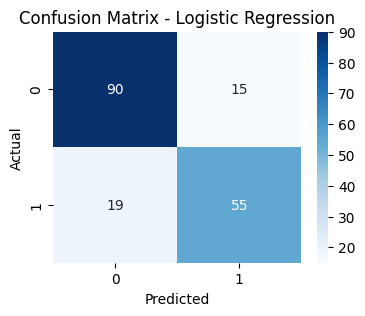

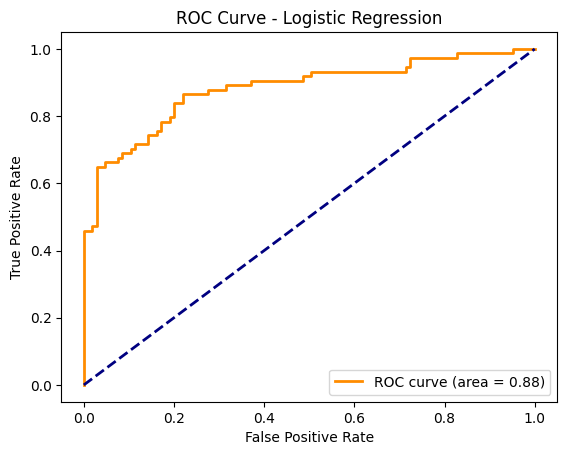


=== Decision Tree ===
Akurasi: 0.7988826815642458

Confusion Matrix:
 [[96  9]
 [27 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



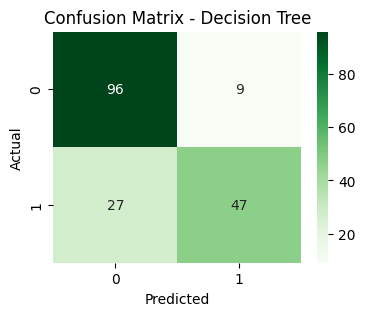

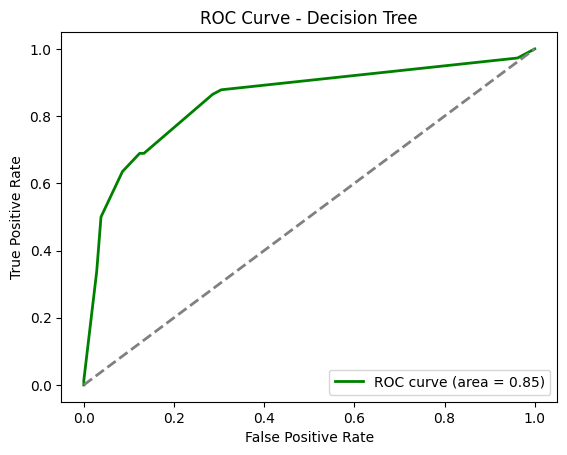


=== Perbandingan Model ===
                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.810056  0.881982
1        Decision Tree  0.798883  0.848713


In [1]:
# ==========================================
# 🧠 Titanic Classification Project
# Logistic Regression & Decision Tree
# ==========================================

# Langkah 1: Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# Langkah 2: Baca dataset
# ==========================================
df = pd.read_csv("titanic.csv")
print("✅ Dataset berhasil dibaca!")
df.head()

# ==========================================
# Langkah 3: Cek informasi dasar dataset
# ==========================================
print("\n=== Informasi Dataset ===")
df.info()
print("\n=== Jumlah Missing Values ===")
print(df.isnull().sum())

# ==========================================
# Langkah 4: Preprocessing data
# ==========================================
# Hapus kolom yang tidak relevan
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Tangani missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Ubah kolom kategorikal ke numerik
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\n=== Data Setelah Preprocessing ===")
df.head()

# ==========================================
# Langkah 5: Pisahkan fitur dan target
# ==========================================
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data menjadi train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nJumlah data latih:", X_train.shape)
print("Jumlah data uji:", X_test.shape)

# ==========================================
# Langkah 6: Standarisasi fitur numerik
# ==========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================================
# Langkah 7: Model 1 - Logistic Regression
# ==========================================
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("\n=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix Visualisasi
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve Logistic Regression
y_prob_log = log_model.predict_proba(X_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# ==========================================
# Langkah 8: Model 2 - Decision Tree
# ==========================================
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n=== Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix Visualisasi
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve Decision Tree
y_prob_tree = tree_model.predict_proba(X_test)[:,1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# ==========================================
# Langkah 9: Bandingkan hasil antar model
# ==========================================
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [acc_log, acc_tree],
    "ROC AUC": [roc_auc_log, roc_auc_tree]
})
print("\n=== Perbandingan Model ===")
print(comparison)
